<a href="https://colab.research.google.com/github/Anukriti2001/Anukriti/blob/master/Minor_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir images

mkdir: cannot create directory ‘images’: File exists


In [ ]:
!pip install bing-image-downloader

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from bing_image_downloader import downloader
downloader.download("pretty rose",limit=30,output_dir='images',adult_filter_off=True)

In [ ]:
!mkdir images

In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

target=[]
images=[]
flat_data=[]
#img_array

DATADIR = '/content/drive/MyDrive/images'
CATEGORIES = ['Lavender','Lily','Rose']
for i in CATEGORIES:
  class_num=CATEGORIES.index(i)
  path=os.path.join(DATADIR,i)
  for img in os.listdir(path):
    img_array=imread(os.path.join(path,img))
    img_resized=resize(img_array,(150,150,3))
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(class_num)
flat_dat=np.array(flat_data)
target=np.array(target)
image=np.array(images)

In [ ]:
flat_data[0]

array([0.99607843, 0.99607843, 0.99607843, ..., 0.99607843, 0.99607843,
       0.99607843])

In [ ]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

<BarContainer object of 3 artists>

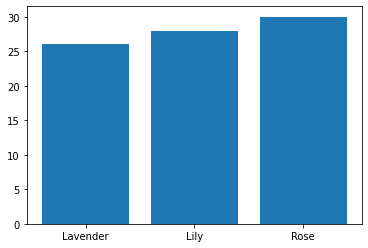

In [ ]:
import numpy as np
unique,count=np.unique(target,return_counts=True)
plt.bar(CATEGORIES,count)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(flat_data,target,test_size=0.3,random_state=109)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid=[
            {'C':[1,10,100,1000],'kernel':['linear']},
            {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']}
            ]
svc=svm.SVC(probability=True)
clf=GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
y_pred=clf.predict(x_test)
y_pred

array([1, 0, 2, 1, 0, 2, 1, 1, 2, 1, 2, 2, 0, 0, 1, 1, 2, 2, 2, 0, 0, 1,
       1, 0, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [ ]:
accuracy_score(y_pred,y_test)

0.9230769230769231

In [ ]:
confusion_matrix(y_pred,y_test)

array([[7, 0, 2],
       [0, 9, 0],
       [0, 0, 8]])

In [ ]:
import pickle
pickle.dump(clf,open('img_model.p','wb'))

In [ ]:
model=pickle.load(open('img_model.p','rb'))


Enter your urlhttps://images.immediate.co.uk/production/volatile/sites/10/2018/02/f185aed9-856e-426e-b69a-5427cf843cbe-8547772.jpg?quality=45&resize=768,574
(574, 768, 3)
PREDICTED OUTPUT:Lavender


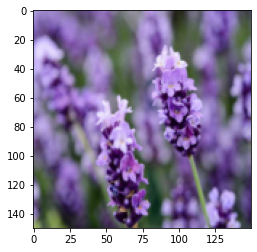

In [ ]:
flat_data=[]
url=input('Enter your url')
img=imread(url)
img_resized=resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data=np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out= model.predict(flat_data) 
y_out=CATEGORIES[y_out[0]]
print(f'PREDICTED OUTPUT:{y_out}')

In [ ]:
!pip install streamlit
!pip install pyngrok
from pyngrok import ngrok

In [ ]:
%%writefile app.py
import streamlit as st
import numpy as np
from skimage.io import imread
from skimage.transform import resize
import pickle
from PIL import Image
st.set_option('depreciation.showfileUploaderEncoding',False)
st.title('Image Classifier')
st.text('Upload the Image')

model=pickle.load(open('img_model.p','rb'))

uploaded_file=st.file_uploader("Choose an image...",type="jpg")
if uploaded_file is not None:
  img=Image.open(uploaded_file)
  st.image(img,caption='Uploaded Image')

if st.button('PREDICT'):
  CATEGORIES=['Lavender','Lily','Rose']
  st.write('Result...')
  flat_data=[]
  img=np.array(img)
  img_resized=resize(img,(150,150,3))
  flat_data.append(img_resized.flatten)
  flat_data=np.array(flat_data) 
  y_out= model.predict(flat_data) 
  y_out=CATEGORIES[y_out[0]]
  st.title(f'PREDICTED OUTPUT:{y_out}')
  q=model.predict_proba(flat_data)
  for index,item in enumerate(CATEGORIES):
    st.write(f'{item}:{q[0][index]*100}')


Overwriting app.py


In [ ]:
!nohup streamlit run app.py &
!kill 502 &
url=ngrok.connect(port='8501')
url

nohup: appending output to 'nohup.out'
/bin/bash: line 0: kill: (502) - No such process


t=2021-02-14T07:39:01+0000 lvl=warn msg="failed to start tunnel" pg=/api/tunnels id=3c131d4910780481 err="Your account may not run more than 2 tunnels over a single ngrok client session.\nThe tunnels already running on this session are:\n[]\n\r\n\r\nERR_NGROK_324\r\n"


PyngrokNgrokHTTPError: ignored